In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
import shutil

# Define the paths for the source and destination directories
input_data_path = '/kaggle/input/ham1000-segmentation-and-classification'
output_data_path = '/kaggle/working/ham1000-segmentation-and-classification'

# Create the output directory structure in the writable area
os.makedirs(os.path.join(output_data_path, 'images'), exist_ok=True)
os.makedirs(os.path.join(output_data_path, 'masks'), exist_ok=True)

# Copy the GroundTruth.csv file to the new directory
shutil.copy(os.path.join(input_data_path, 'GroundTruth.csv'), os.path.join(output_data_path, 'GroundTruth.csv'))

# Copy all files from the images and masks directories to the new folder
for folder_name in ['images', 'masks']:
    input_folder = os.path.join(input_data_path, folder_name)
    output_folder = os.path.join(output_data_path, folder_name)

    for file in os.listdir(input_folder):
        file_path = os.path.join(input_folder, file)
        if os.path.isfile(file_path):
            shutil.copy(file_path, output_folder)

In [3]:
DATA_PATH = "/kaggle/working/ham1000-segmentation-and-classification"
print(os.listdir(DATA_PATH))

['masks', 'GroundTruth.csv', 'images']


In [4]:
import pandas as pd

df=pd.read_csv(os.path.join(DATA_PATH,'GroundTruth.csv'))
print (df.head())
print (len(df))
print (df.columns)

          image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1  ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3  ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
10015
Index(['image', 'MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], dtype='object')


In [5]:
import pandas as pd
import os

# Function to get the file types and counts in a folder
def get_file_types(folder_path):
    file_types = {}
    for file in os.listdir(folder_path):
        ext = os.path.splitext(file)[1]  # Get the file extension
        if ext:
            file_types[ext] = file_types.get(ext, 0) + 1
    return file_types

# Paths to the images, masks, and GroundTruth CSV
images_path = os.path.join(DATA_PATH, "images")
masks_path = os.path.join(DATA_PATH, "masks")
ground_truth_path = os.path.join(DATA_PATH, 'GroundTruth.csv')

# Get file types and counts in images and masks folders
image_file_types = get_file_types(images_path)
mask_file_types = get_file_types(masks_path)

# Display file types and counts
print("File types and counts in images folder:")
for ext, count in image_file_types.items():
    print(f"{ext}: {count}")

print("\nFile types and counts in masks folder:")
for ext, count in mask_file_types.items():
    print(f"{ext}: {count}")

# Count the total number of records (files) in the image and mask folders
num_images = sum(image_file_types.values())
num_masks = sum(mask_file_types.values())

# Display the total number of records
print(f"\nTotal number of images: {num_images}")
print(f"Total number of masks: {num_masks}")

# Step: Count the number of records in GroundTruth.csv
if os.path.exists(ground_truth_path):
    df = pd.read_csv(ground_truth_path)
    num_ground_truth_records = len(df)
    print(f"Number of records in GroundTruth.csv: {num_ground_truth_records}")
else:
    print(f"GroundTruth.csv not found at {ground_truth_path}.")


File types and counts in images folder:
.jpg: 10015
.txt: 2

File types and counts in masks folder:
.png: 10015

Total number of images: 10017
Total number of masks: 10015
Number of records in GroundTruth.csv: 10015


In [6]:
# Remove all .txt files from the copied images and masks folders
for folder_name in ['images', 'masks']:
    folder_path = os.path.join(output_data_path, folder_name)

    for file in os.listdir(folder_path):
        if file.endswith(".txt"):
            file_path = os.path.join(folder_path, file)
            os.remove(file_path)
            print(f"Removed file: {file_path}")

Removed file: /kaggle/working/ham1000-segmentation-and-classification/images/ATTRIBUTION.txt
Removed file: /kaggle/working/ham1000-segmentation-and-classification/images/LICENSE.txt


In [7]:
# Get file types in images and masks folders
image_file_types = get_file_types(images_path)
mask_file_types = get_file_types(masks_path)

# Display file types
print("File types in images folder:")
print(image_file_types)

print("\nFile types in masks folder:")
print(mask_file_types)

File types in images folder:
{'.jpg': 10015}

File types in masks folder:
{'.png': 10015}


In [8]:
df['image']=df['image'].apply(lambda x: x+ '.jpg')
print (df.head())

              image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0024306.jpg  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1  ISIC_0024307.jpg  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0024308.jpg  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3  ISIC_0024309.jpg  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0024310.jpg  1.0  0.0  0.0    0.0  0.0  0.0   0.0


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   10015 non-null  object 
 1   MEL     10015 non-null  float64
 2   NV      10015 non-null  float64
 3   BCC     10015 non-null  float64
 4   AKIEC   10015 non-null  float64
 5   BKL     10015 non-null  float64
 6   DF      10015 non-null  float64
 7   VASC    10015 non-null  float64
dtypes: float64(7), object(1)
memory usage: 626.1+ KB


Number of duplicated images: 221

Displaying examples of duplicated images:


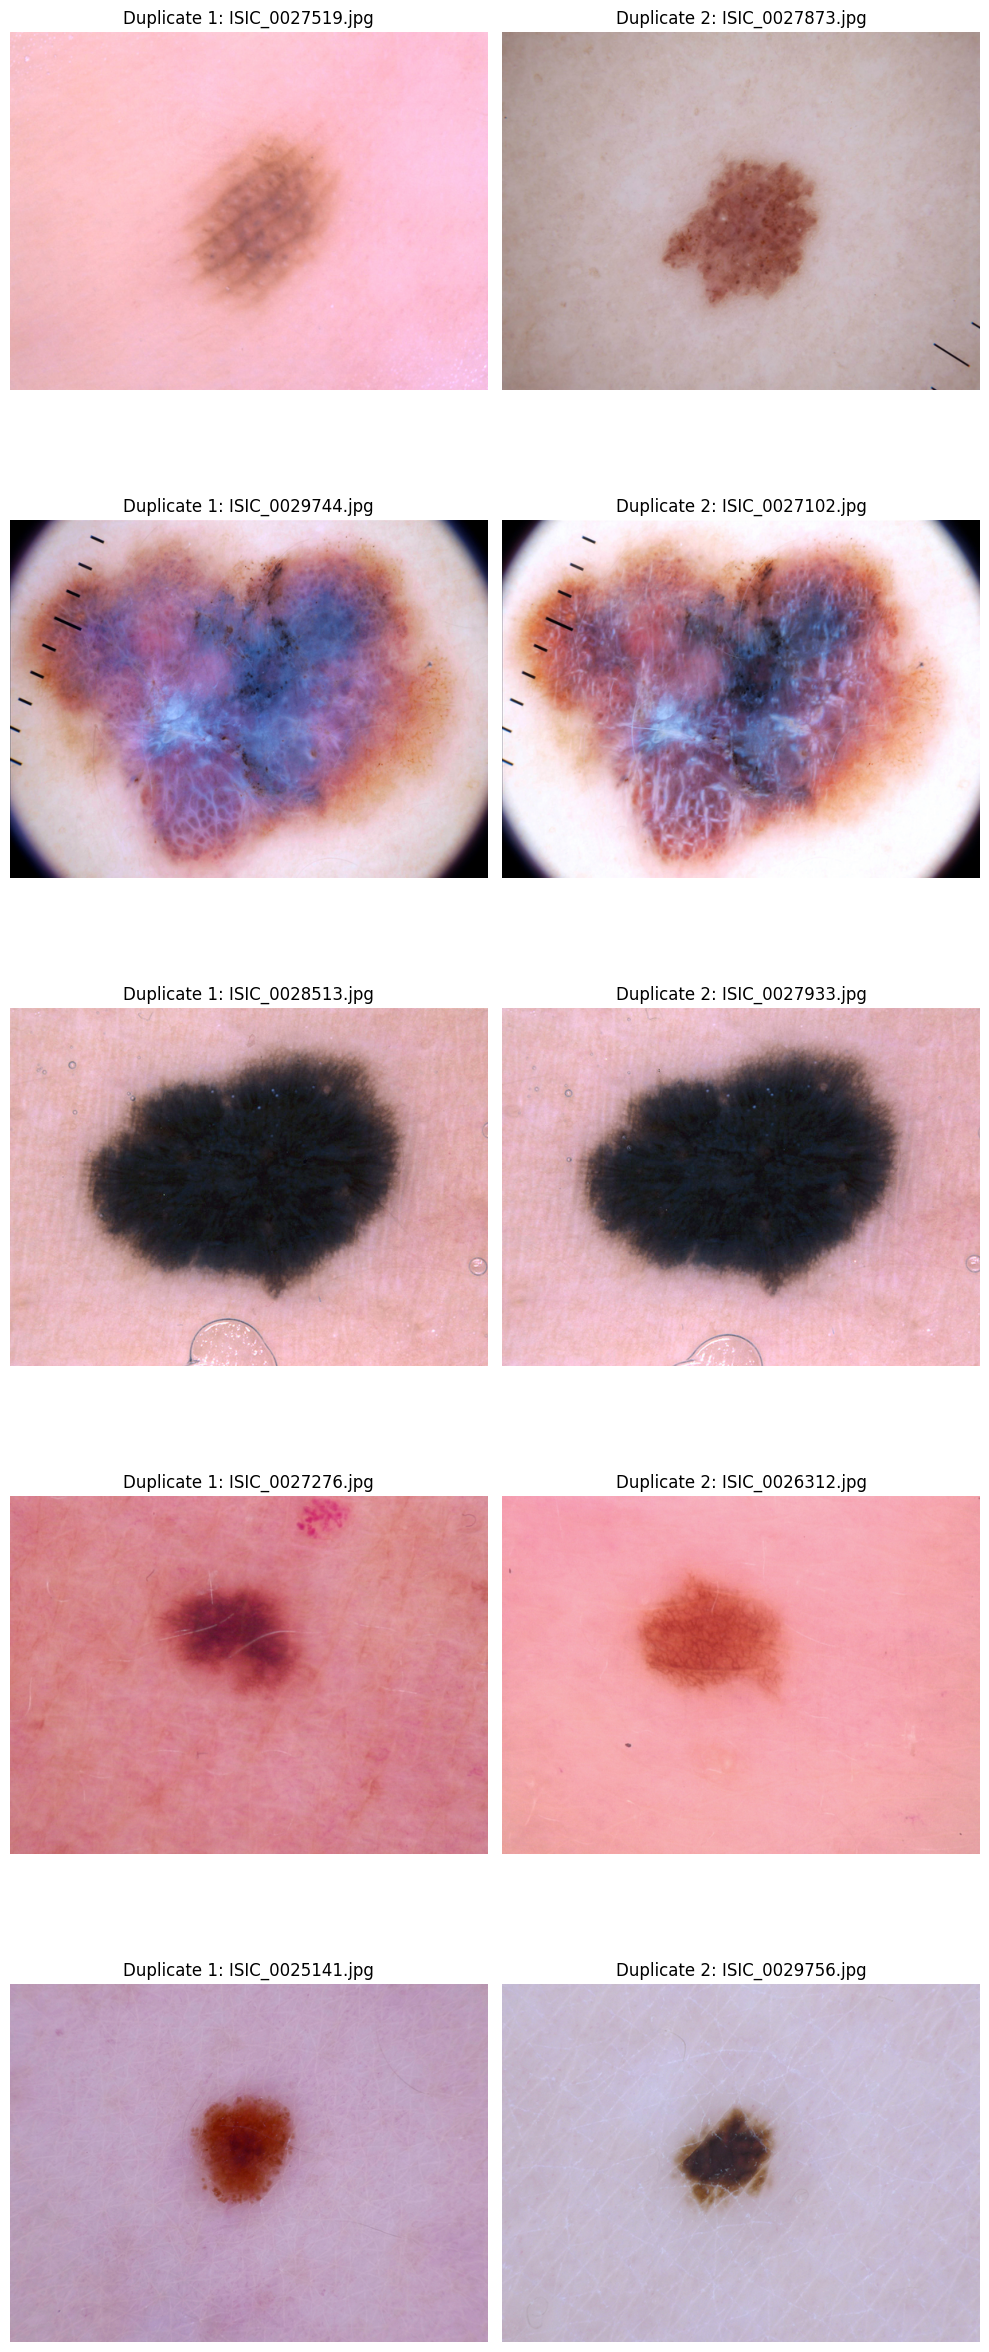

In [10]:
import os
import imagehash
from PIL import Image
import matplotlib.pyplot as plt

# Helper function to compute perceptual hash (pHash)
def get_image_hash(image_path):
    image = Image.open(image_path)
    return imagehash.phash(image)

# Paths to the images and masks folders
images_path = os.path.join(DATA_PATH, "images")

# Step 1: Identify duplicate images based on perceptual hash (pHash)
image_hashes = {}
duplicates = []

# Loop over each image in the images folder and compute the perceptual hash
for file_name in os.listdir(images_path):
    file_path = os.path.join(images_path, file_name)
    
    if os.path.isfile(file_path) and file_name.endswith('.jpg'):
        image_hash = get_image_hash(file_path)
        
        # Check if the hash already exists (indicating a duplicate)
        found_duplicate = False
        for existing_hash, existing_file in image_hashes.items():
            if image_hash - existing_hash < 5:  # If hash difference is small, consider it a duplicate
                duplicates.append((file_name, existing_file))  # Collect duplicate pairs
                found_duplicate = True
                break
        
        if not found_duplicate:
            image_hashes[image_hash] = file_name  # Store first occurrence

# Remove duplicates and get unique duplicate pairs
duplicates = list(set(duplicates))

# Step 2: Count the number of duplicated images
num_duplicates = len(duplicates)
print(f"Number of duplicated images: {num_duplicates}")

# Step 3: Display some examples of duplicated images
print("\nDisplaying examples of duplicated images:")

def show_duplicate_images(duplicates, num_examples=5):
    # Show the first few examples of duplicate image pairs
    fig, axes = plt.subplots(num_examples, 2, figsize=(10, 5 * num_examples))
    for i, (dup1, dup2) in enumerate(duplicates[:num_examples]):
        img1 = Image.open(os.path.join(images_path, dup1))
        img2 = Image.open(os.path.join(images_path, dup2))
        axes[i, 0].imshow(img1)
        axes[i, 0].set_title(f"Duplicate 1: {dup1}")
        axes[i, 0].axis('off')
        axes[i, 1].imshow(img2)
        axes[i, 1].set_title(f"Duplicate 2: {dup2}")
        axes[i, 1].axis('off')
    plt.tight_layout()
    plt.show()

show_duplicate_images(duplicates, num_examples=5)


In [11]:
ground_truth_path = os.path.join(DATA_PATH, 'GroundTruth.csv')

# Load GroundTruth.csv once to optimize the process
if os.path.exists(ground_truth_path):
    df = pd.read_csv(ground_truth_path)
    print(f"Initial number of rows in GroundTruth.csv: {len(df)}")
else:
    print(f"GroundTruth.csv not found at {ground_truth_path}. Skipping CSV update.")
    df = None

# Track missing masks for reporting
missing_masks = []

for dup_image, existing_image in duplicates:
    # Remove duplicate image
    dup_image_path = os.path.join(images_path, dup_image)
    if os.path.exists(dup_image_path):
        os.remove(dup_image_path)
        # print(f"Removed duplicate image: {dup_image_path}")
    
    # Remove corresponding mask for the duplicate image
    dup_mask_name = os.path.splitext(dup_image)[0] + '_segmentation.png'  # Convert to *_segmentation.png
    dup_mask_path = os.path.join(masks_path, dup_mask_name)
    if os.path.exists(dup_mask_path):
        os.remove(dup_mask_path)
        # print(f"Removed mask for duplicate image: {dup_mask_path}")
    else:
        missing_masks.append((dup_image, dup_mask_name))  # Record missing mask for debugging
        # print(f"Mask not found for duplicate image: {dup_image} -> Expected: {dup_mask_name}")

    # Remove corresponding row in GroundTruth.csv for the duplicate image
    if df is not None:
        # Strip the extension and compare the base names
        dup_image_name_no_ext = os.path.splitext(dup_image)[0]  # Remove .jpg extension
        # Debugging: Uncomment or use pass as a placeholder
        # if dup_image_name_no_ext in df['image'].values:
        #     # print(f"Found {dup_image_name_no_ext} in GroundTruth.csv. Removing it.")
        # else:
        #     print(f"{dup_image_name_no_ext} not found in GroundTruth.csv.")
        
        # Filter out the row for the duplicated image
        df = df[df['image'] != dup_image_name_no_ext]

# Save the updated GroundTruth.csv
if df is not None:
    df.to_csv(ground_truth_path, index=False)
    print(f"Updated GroundTruth.csv saved at: {ground_truth_path}")
    print(f"Number of records in GroundTruth.csv: {len(df)}")  # Print the number of rows


Initial number of rows in GroundTruth.csv: 10015
Updated GroundTruth.csv saved at: /kaggle/working/ham1000-segmentation-and-classification/GroundTruth.csv
Number of records in GroundTruth.csv: 9794


In [12]:
# Get file types in images and masks folders
image_file_types = get_file_types(images_path)
mask_file_types = get_file_types(masks_path)

# Display file types

print("File ")
print("File types in images folder:")
print(image_file_types)

print("\nFile types in masks folder:")
print(mask_file_types)

File 
File types in images folder:
{'.jpg': 9794}

File types in masks folder:
{'.png': 9794}


In [13]:
# Get file types and counts in images and masks folders
image_file_types = get_file_types(images_path)
mask_file_types = get_file_types(masks_path)

# Display file types and counts
print("File types and counts in images folder:")
for ext, count in image_file_types.items():
    print(f"{ext}: {count}")

print("\nFile types and counts in masks folder:")
for ext, count in mask_file_types.items():
    print(f"{ext}: {count}")

# Count the total number of records (files) in the image and mask folders
num_images = sum(image_file_types.values())
num_masks = sum(mask_file_types.values())

# Display the total number of records
print(f"\nTotal number of images: {num_images}")
print(f"Total number of masks: {num_masks}")

# Step: Count the number of records in GroundTruth.csv
if os.path.exists(ground_truth_path):
    df = pd.read_csv(ground_truth_path)
    num_ground_truth_records = len(df)
    print(f"Number of records in GroundTruth.csv: {num_ground_truth_records}")
else:
    print(f"GroundTruth.csv not found at {ground_truth_path}.")


File types and counts in images folder:
.jpg: 9794

File types and counts in masks folder:
.png: 9794

Total number of images: 9794
Total number of masks: 9794
Number of records in GroundTruth.csv: 9794


In [14]:
df

image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0     ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1     ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2     ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3     ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4     ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
...            ...  ...  ...  ...    ...  ...  ...   ...
9789  ISIC_0034316  1.0  0.0  0.0    0.0  0.0  0.0   0.0
9790  ISIC_0034317  1.0  0.0  0.0    0.0  0.0  0.0   0.0
9791  ISIC_0034318  0.0  0.0  0.0    0.0  1.0  0.0   0.0
9792  ISIC_0034319  0.0  1.0  0.0    0.0  0.0  0.0   0.0
9793  ISIC_0034320  0.0  1.0  0.0    0.0  0.0  0.0   0.0

[9794 rows x 8 columns]

In [15]:
list(df.columns[1:])


['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

In [16]:
# Dictionary for converting short labels to full class names (already defined)
lesion_type_dict = {
    'NV': 'Melanocytic nevi',
    'MEL': 'Melanoma',
    'BKL': 'Benign keratosis like lesions',
    'BCC': 'Basal cell carcinoma',
    'AKIEC': 'Actinic keratoses',
    'VASC': 'Vascular lesions',
    'DF': 'Dermatofibroma'
}

# Convert the one-hot encoded labels into class labels and numeric indices
labels = list(df.columns[1:])
label_list = []
for i in range(len(df)):
    row = list(df.iloc[i])[1:]
    index = np.argmax(row)
    label = lesion_type_dict[labels[index]]
    label_list.append(label)
df['label'] = label_list
df = df.drop(labels, axis=1)

# Convert label to category codes (numeric labels)
df['label_idx'] = pd.Categorical(df['label']).codes

# Display the data
print(df.head())

          image             label  label_idx
0  ISIC_0024306  Melanocytic nevi          4
1  ISIC_0024307  Melanocytic nevi          4
2  ISIC_0024308  Melanocytic nevi          4
3  ISIC_0024309  Melanocytic nevi          4
4  ISIC_0024310          Melanoma          5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image      9794 non-null   object
 1   label      9794 non-null   object
 2   label_idx  9794 non-null   int8  
dtypes: int8(1), object(2)
memory usage: 162.7+ KB



Class distribution in GroundTruth:
label
Melanocytic nevi                 6519
Melanoma                         1096
Benign keratosis like lesions    1090
Basal cell carcinoma              513
Actinic keratoses                 325
Vascular lesions                  138
Dermatofibroma                    113
Name: count, dtype: int64


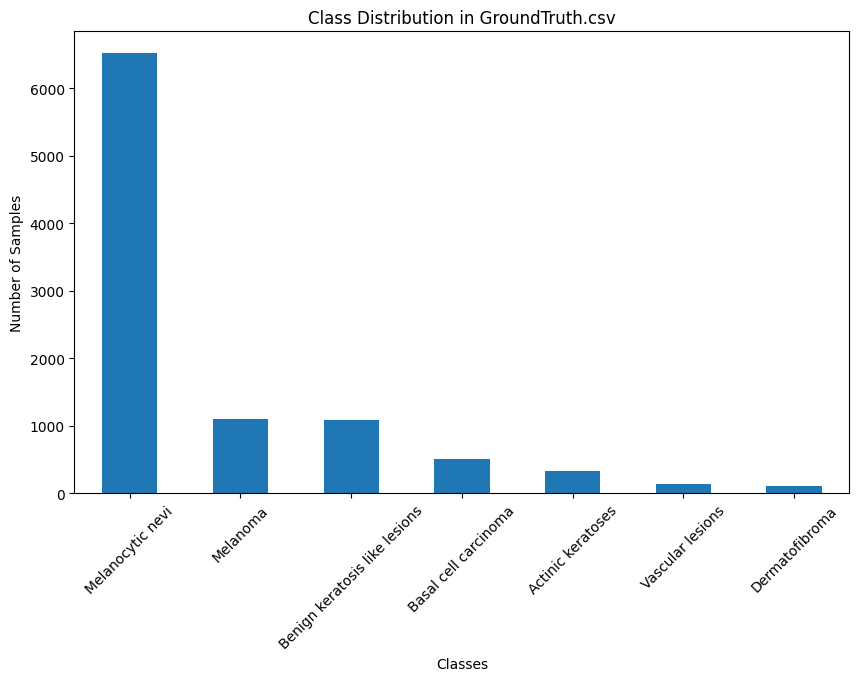

In [18]:
# Display class distribution (based on the 'label' column)
print("\nClass distribution in GroundTruth:")
print(df['label'].value_counts())  # This shows how many samples belong to each class

# Plot class distribution
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution in GroundTruth.csv")
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()


New class counts after downsampling (Total Dataset):
label
Melanocytic nevi                 300
Melanoma                         300
Benign keratosis like lesions    300
Actinic keratoses                300
Basal cell carcinoma             300
Vascular lesions                 138
Dermatofibroma                   113
Name: count, dtype: int64

Class distribution in train set:
label
Basal cell carcinoma             240
Benign keratosis like lesions    240
Melanoma                         240
Actinic keratoses                240
Melanocytic nevi                 240
Vascular lesions                 110
Dermatofibroma                    90
Name: count, dtype: int64

Class distribution in validation set:
label
Benign keratosis like lesions    30
Basal cell carcinoma             30
Melanocytic nevi                 30
Melanoma                         30
Actinic keratoses                30
Vascular lesions                 14
Dermatofibroma                   11
Name: count, dtype: int64

Class 

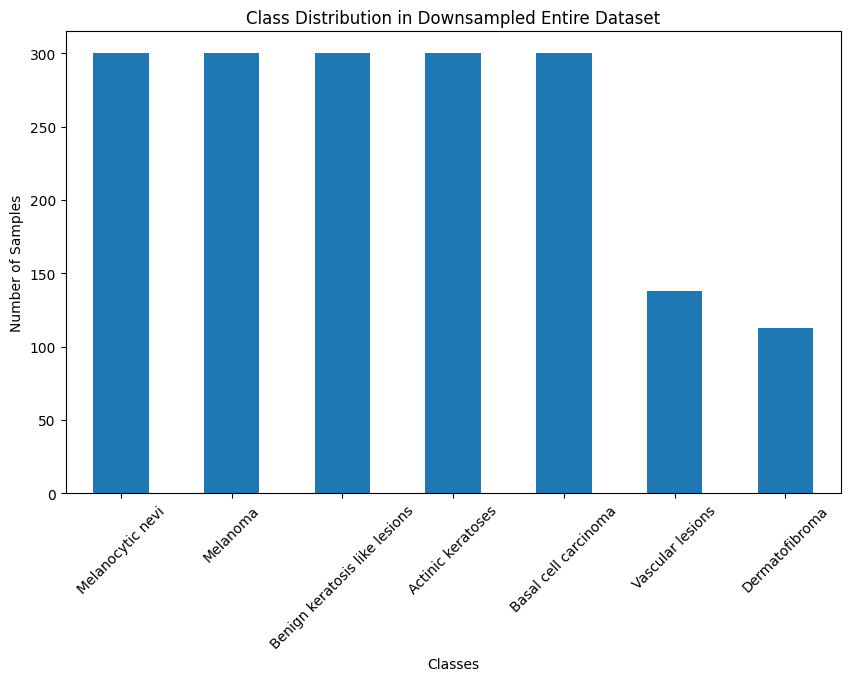

In [19]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming 'df' is your original DataFrame

# Step 1: Downsampling the classes to ensure no class exceeds 300 samples
def downsample(df, max_samples=300):
    """
    Downsample each class in the DataFrame to have a maximum of `max_samples` samples.
    """
    downsampled_df = pd.DataFrame()
    
    for label in df['label'].unique():
        class_df = df[df['label'] == label]
        
        # Ensure that we sample exactly `max_samples` if there are more than `max_samples` rows
        if len(class_df) > max_samples:
            class_df = class_df.sample(n=max_samples, random_state=42)
        
        downsampled_df = pd.concat([downsampled_df, class_df], axis=0)
    
    return downsampled_df

# Downsample the dataset (set max_samples to 300)
df_downsampled = downsample(df, max_samples=300)

# Step 2: Split the data into train, validation, and test sets (80-10-10 split with stratification)
train_df, temp_df = train_test_split(df_downsampled, test_size=0.2, random_state=42, stratify=df_downsampled['label'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

# Step 3: Print the new class counts after downsampling for the entire dataset
print("\nNew class counts after downsampling (Total Dataset):")
print(df_downsampled['label'].value_counts())  # Display class counts for the entire dataset

# Step 4: Print class distribution in the train, validation, and test sets
print("\nClass distribution in train set:")
print(train_df['label'].value_counts())

print("\nClass distribution in validation set:")
print(val_df['label'].value_counts())

print("\nClass distribution in test set:")
print(test_df['label'].value_counts())

# Step 5: Calculate class weights using the 'label' column
def calculate_class_weights(labels):
    """
    Calculate class weights inversely proportional to the frequency of each class.
    
    :param labels: Array or list of class labels
    :return: Tensor of class weights
    """
    # Get unique class labels and their counts
    unique_classes, counts = np.unique(labels, return_counts=True)
    
    # Compute class weights inversely proportional to class frequency
    class_weights = 1.0 / counts  # Inverse of class frequencies
    
    # Normalize the weights to make the largest weight equal to 1 (optional)
    max_weight = np.max(class_weights)
    class_weights = class_weights / max_weight
    
    # Sort class weights based on class labels to maintain alignment
    sorted_class_weights = sorted(zip(unique_classes, class_weights), key=lambda x: x[0])
    sorted_classes, sorted_weights = zip(*sorted_class_weights)
    
    # Convert to PyTorch tensor
    class_weights_tensor = torch.tensor(sorted_weights, dtype=torch.float)
    
    # Print the class weights for each label
    print("\nClass Weights (Dynamically Calculated):")
    for class_name, weight in zip(sorted_classes, sorted_weights):
        print(f"Class: {class_name}, Weight: {weight:.4f}")
    
    return sorted_classes, class_weights_tensor

# Get class labels from the entire dataset (not just training)
all_labels = df_downsampled['label'].values

# Calculate class weights for the entire dataset
sorted_classes, class_weights_tensor = calculate_class_weights(all_labels)

# Step 6: Display the class weights tensor
print("\nClass Weights Tensor:", class_weights_tensor)

# (Optional) Plot the class distribution in the downsampled entire data
plt.figure(figsize=(10, 6))
df_downsampled['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution in Downsampled Entire Dataset")
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

In [20]:
# e.g to use in model
# criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

In [21]:
#Get the number of samples in the train, validation, and test sets
print(f"\nNumber of samples in the training set: {len(train_df)}")
print(f"Number of samples in the validation set: {len(val_df)}")
print(f"Number of samples in the test set: {len(test_df)}")



Number of samples in the training set: 1400
Number of samples in the validation set: 175
Number of samples in the test set: 176


In [22]:
import os
import pandas as pd

# Paths to your directories
data_path = '/kaggle/working/ham1000-segmentation-and-classification'
images_path = os.path.join(data_path, 'images')
masks_path = os.path.join(data_path, 'masks')
ground_truth_path = os.path.join(data_path, 'GroundTruth.csv')

# Load the GroundTruth CSV file
if os.path.exists(ground_truth_path):
    df = pd.read_csv(ground_truth_path)
    print(f"Initial number of rows in GroundTruth.csv: {len(df)}")
else:
    print(f"GroundTruth.csv not found at {ground_truth_path}. Exiting.")
    df = None

# Assuming train_df, val_df, and test_df are already loaded
# For example, you can load them from pickled files
# train_df = pd.read_pickle('train_df.pkl')
# val_df = pd.read_pickle('val_df.pkl')
# test_df = pd.read_pickle('test_df.pkl')

# Get the list of image names from the DataFrames
train_images = set(train_df['image'].values)  # Assuming 'image' column has image names
val_images = set(val_df['image'].values)
test_images = set(test_df['image'].values)

# Combine them into one set of valid images
valid_images = train_images.union(val_images).union(test_images)
print(f"Total valid images: {len(valid_images)}")

# Track missing masks for reporting
missing_masks = []

# Loop through images in the images folder
for img_name in os.listdir(images_path):
    # Check if the image is in valid_images
    if os.path.splitext(img_name)[0] not in valid_images:
        # Remove the image if it's not in the valid set
        img_path = os.path.join(images_path, img_name)
        if os.path.exists(img_path):
            os.remove(img_path)
            # print(f"Removed image: {img_path}")

        # Remove the corresponding mask (if it exists)
        mask_name = os.path.splitext(img_name)[0] + '_segmentation.png'
        mask_path = os.path.join(masks_path, mask_name)
        if os.path.exists(mask_path):
            os.remove(mask_path)
            # print(f"Removed mask for image: {mask_path}")
        else:
            missing_masks.append(mask_name)  # Track missing masks
            # print(f"Missing mask for image: {mask_name}")

# Step 4: Update GroundTruth.csv to remove non-valid images
if df is not None:
    # Filter the dataframe to only keep rows with valid images
    df = df[df['image'].isin(valid_images)]
    print(f"Updated number of rows in GroundTruth.csv: {len(df)}")

    # Save the updated GroundTruth.csv
    df.to_csv(ground_truth_path, index=False)
    print(f"Updated GroundTruth.csv saved at: {ground_truth_path}")

# Optional: Print out missing masks for review
print("\nMissing masks during cleanup:")
for missing_mask in missing_masks:
    print(missing_mask)


Initial number of rows in GroundTruth.csv: 9794
Total valid images: 1751
Updated number of rows in GroundTruth.csv: 1751
Updated GroundTruth.csv saved at: /kaggle/working/ham1000-segmentation-and-classification/GroundTruth.csv

Missing masks during cleanup:


In [23]:
type(train_df)

pandas.core.frame.DataFrame

In [24]:
# Paths to the images, masks, and GroundTruth CSV
images_path = os.path.join(DATA_PATH, "images")
masks_path = os.path.join(DATA_PATH, "masks")
ground_truth_path = os.path.join(DATA_PATH, 'GroundTruth.csv')

# Get file types and counts in images and masks folders
image_file_types = get_file_types(images_path)
mask_file_types = get_file_types(masks_path)

# Display file types and counts
print("File types and counts in images folder:")
for ext, count in image_file_types.items():
    print(f"{ext}: {count}")

print("\nFile types and counts in masks folder:")
for ext, count in mask_file_types.items():
    print(f"{ext}: {count}")

# Count the total number of records (files) in the image and mask folders
num_images = sum(image_file_types.values())
num_masks = sum(mask_file_types.values())

# Display the total number of records
print(f"\nTotal number of images: {num_images}")
print(f"Total number of masks: {num_masks}")

# Step: Count the number of records in GroundTruth.csv
if os.path.exists(ground_truth_path):
    df = pd.read_csv(ground_truth_path)
    num_ground_truth_records = len(df)
    print(f"Number of records in GroundTruth.csv: {num_ground_truth_records}")
else:
    print(f"GroundTruth.csv not found at {ground_truth_path}.")

File types and counts in images folder:
.jpg: 1751

File types and counts in masks folder:
.png: 1751

Total number of images: 1751
Total number of masks: 1751
Number of records in GroundTruth.csv: 1751


In [25]:
train_df

image                          label  label_idx
276   ISIC_0024590           Basal cell carcinoma          1
9179  ISIC_0033693  Benign keratosis like lesions          2
9058  ISIC_0033571           Basal cell carcinoma          1
8045  ISIC_0032545               Vascular lesions          6
9538  ISIC_0034059                       Melanoma          5
...            ...                            ...        ...
9689  ISIC_0034214               Vascular lesions          6
4632  ISIC_0029048  Benign keratosis like lesions          2
795   ISIC_0025128                       Melanoma          5
301   ISIC_0024618               Melanocytic nevi          4
5048  ISIC_0029472  Benign keratosis like lesions          2

[1400 rows x 3 columns]

In [26]:
import pandas as pd

# Assuming 'train_df', 'val_df', and 'test_df' are your DataFrames

# Resetting index will move the index into a column and create a new default index.
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Print the updated DataFrame to verify
print(train_df.head())


          image                          label  label_idx
0  ISIC_0024590           Basal cell carcinoma          1
1  ISIC_0033693  Benign keratosis like lesions          2
2  ISIC_0033571           Basal cell carcinoma          1
3  ISIC_0032545               Vascular lesions          6
4  ISIC_0034059                       Melanoma          5


In [27]:
# Save the DataFrames as .pkl files
train_df.to_pickle('train_df.pkl')
val_df.to_pickle('val_df.pkl')
test_df.to_pickle('test_df.pkl')

print("DataFrames have been saved as .pkl files.")


DataFrames have been saved as .pkl files.


# dataset model trainer classes

In [28]:
from torch.utils.data import Dataset
from PIL import Image
import os
from torchvision import transforms

class Ham1000Dataset(Dataset):
    def __init__(self, dataframe, images_path, masks_path, transform=None, mask_transform=None,):
        """
        Args:
            dataframe (pd.DataFrame): DataFrame containing the image metadata (image name, label, label_idx)
            images_path (str): Path to the images directory
            masks_path (str): Path to the masks directory
            transform (callable, optional): Optional transform to be applied on a sample (for images)
            mask_transform (callable, optional): Optional transform to be applied on the mask
        """
        self.dataframe = dataframe
        self.images_path = images_path
        self.masks_path = masks_path
        self.transform = transform
        self.mask_transform = mask_transform

        # If no transformation is provided, default to ToTensor
        if self.transform is None:
            self.transform = transforms.ToTensor()
        if self.mask_transform is None:
            self.mask_transform = transforms.ToTensor()

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Get image and corresponding label from the dataframe
        row = self.dataframe.iloc[idx]
        image_name = row['image']
        label_idx = row['label_idx']
        
        # Load the image (RGB format)
        image_path = os.path.join(self.images_path, f"{image_name}.jpg")
        image = Image.open(image_path).convert('RGB')
        
        # Apply image transformations (if any)
        image = self.transform(image)
        
        # Create a sample dictionary for image and label
        sample = {'image': image, 'label': label_idx}  # Only label_idx for classification
        
        # If in training mode, load the segmentation mask and apply mask transformations
        mask_path = os.path.join(self.masks_path, f"{image_name}_segmentation.png")  # Modify for segmentation
        mask = Image.open(mask_path).convert('L')  # Grayscale mask (single channel)
        
        # Apply mask transformations (if any)
        mask = self.mask_transform(mask)
        
        # Add mask to the sample
        sample['mask'] = mask
        
        return sample


In [29]:
from torch.utils.data import DataLoader
from torchvision import transforms

# Define transformations for images (e.g., resizing, normalization, etc.)
image_transform = transforms.Compose([
    transforms.Resize((244, 244)),  # Resize images to a fixed size
    transforms.ToTensor(),  # Convert image to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalization for pre-trained ResNet
])

# Define transformation for masks (if applicable)
mask_transform = transforms.Compose([
    transforms.Resize((244, 244)),  # Resize mask to match image size
    transforms.ToTensor()  # Convert mask to Tensor
])

In [30]:
# Instantiate the dataset for training, validation, and testing
train_dataset = Ham1000Dataset(
    dataframe=train_df, 
    images_path='/kaggle/working/ham1000-segmentation-and-classification/images',
    masks_path='/kaggle/working/ham1000-segmentation-and-classification/masks',
    transform=image_transform,
    mask_transform=mask_transform,  # Apply mask transformation during training
)

val_dataset = Ham1000Dataset(
    dataframe=val_df, 
    images_path='/kaggle/working/ham1000-segmentation-and-classification/images',
    masks_path='/kaggle/working/ham1000-segmentation-and-classification/masks',
    transform=image_transform,
    mask_transform=mask_transform,  # Apply mask transformation during training
)

test_dataset = Ham1000Dataset(
    dataframe=test_df, 
    images_path='/kaggle/working/ham1000-segmentation-and-classification/images',
    masks_path='/kaggle/working/ham1000-segmentation-and-classification/masks',
    transform=image_transform,
    mask_transform=mask_transform,  # Apply mask transformation during training
)


In [31]:
from torch.utils.data import DataLoader

# Create DataLoaders for each dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


Inspecting Train Loader...
Batch 1 in Train Loader
Type of images: <class 'torch.Tensor'>
Type of labels_class: <class 'torch.Tensor'>
Type of masks: <class 'torch.Tensor'>
Images shape: torch.Size([32, 3, 244, 244])
Labels shape: torch.Size([32])
Masks shape: torch.Size([32, 1, 244, 244])


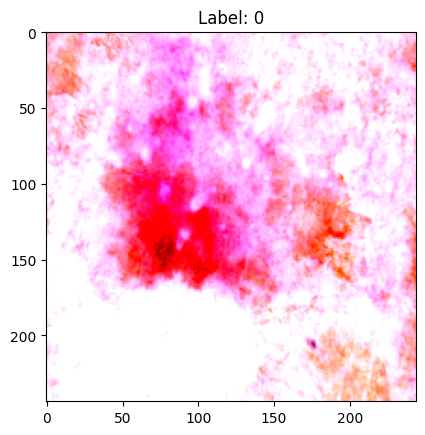

Batch 2 in Train Loader
Type of images: <class 'torch.Tensor'>
Type of labels_class: <class 'torch.Tensor'>
Type of masks: <class 'torch.Tensor'>
Images shape: torch.Size([32, 3, 244, 244])
Labels shape: torch.Size([32])
Masks shape: torch.Size([32, 1, 244, 244])
Inspecting Validation Loader...
Batch 1 in Validation Loader
Type of images: <class 'torch.Tensor'>
Type of labels_class: <class 'torch.Tensor'>
Type of masks: <class 'torch.Tensor'>
Images shape: torch.Size([32, 3, 244, 244])
Labels shape: torch.Size([32])
Masks shape: torch.Size([32, 1, 244, 244])


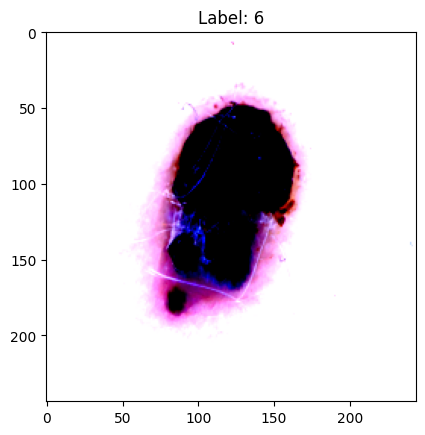

Batch 2 in Validation Loader
Type of images: <class 'torch.Tensor'>
Type of labels_class: <class 'torch.Tensor'>
Type of masks: <class 'torch.Tensor'>
Images shape: torch.Size([32, 3, 244, 244])
Labels shape: torch.Size([32])
Masks shape: torch.Size([32, 1, 244, 244])
Inspecting Test Loader...
Batch 1 in Test Loader
Type of images: <class 'torch.Tensor'>
Type of labels_class: <class 'torch.Tensor'>
Type of masks: <class 'torch.Tensor'>
Images shape: torch.Size([32, 3, 244, 244])
Labels shape: torch.Size([32])
Masks shape: torch.Size([32, 1, 244, 244])


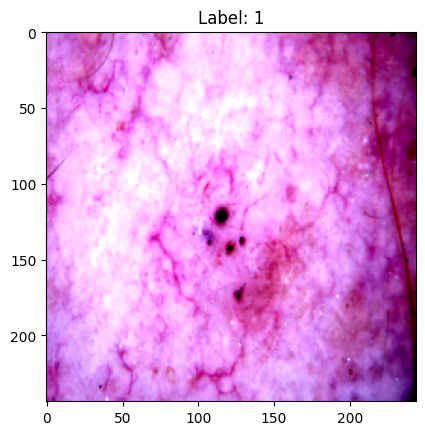

Batch 2 in Test Loader
Type of images: <class 'torch.Tensor'>
Type of labels_class: <class 'torch.Tensor'>
Type of masks: <class 'torch.Tensor'>
Images shape: torch.Size([32, 3, 244, 244])
Labels shape: torch.Size([32])
Masks shape: torch.Size([32, 1, 244, 244])


In [32]:
import matplotlib.pyplot as plt

def inspect_loader(loader, loader_name):
    print(f"Inspecting {loader_name}...")
    
    for batch_idx, batch in enumerate(loader):
        print(f"Batch {batch_idx + 1} in {loader_name}")
        
        # Extract image, label, and mask (if available)
        images = batch['image']
        labels_class = batch['label']
        masks = batch.get('mask', None)  # Use .get() to handle cases without masks in val/test
        
        # Print types and shapes
        print(f"Type of images: {type(images)}")
        print(f"Type of labels_class: {type(labels_class)}")
        if masks is not None:
            print(f"Type of masks: {type(masks)}")
        
        # Print shapes
        print(f"Images shape: {images.shape}")
        print(f"Labels shape: {labels_class.shape}")
        if masks is not None:
            print(f"Masks shape: {masks.shape}")
        
        # Display the first image in the batch
        if batch_idx == 0:
            plt.imshow(images[0].permute(1, 2, 0).cpu().numpy())
            plt.title(f"Label: {labels_class[0]}")
            plt.show()
        
        # Optionally stop after one batch to save time
        if batch_idx >= 1:
            break


# Inspect each loader
inspect_loader(train_loader, "Train Loader")
inspect_loader(val_loader, "Validation Loader")
inspect_loader(test_loader, "Test Loader")


In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [34]:

# Debugging the types and moving to the correct device
for batch in train_loader:
    # Print types
    print("Type of images:", type(batch['image']))  # Should print <class 'torch.Tensor'>
    print("Type of masks:", type(batch['mask']))    # Should print <class 'torch.Tensor'>
    print("Type of labels:", type(batch['label']))  # Should print <class 'torch.Tensor'>
    
    # Move tensors to the correct device
    images = batch['image'].to(device)
    masks = batch['mask'].to(device)
    labels = batch['label'].to(device)
    
    # Optionally, inspect the shapes after moving to the device
    print("Images shape:", images.shape)
    print("Masks shape:", masks.shape)
    print("Labels shape:", labels.shape)
    
    # Break after first batch to inspect
    break


Type of images: <class 'torch.Tensor'>
Type of masks: <class 'torch.Tensor'>
Type of labels: <class 'torch.Tensor'>
Images shape: torch.Size([32, 3, 244, 244])
Masks shape: torch.Size([32, 1, 244, 244])
Labels shape: torch.Size([32])


In [35]:
def calculate_iou(pred_mask, true_mask, smooth=1e-6):
    pred_mask = torch.sigmoid(pred_mask) > 0.5
    pred_mask = pred_mask.float()
    intersection = torch.sum(pred_mask * true_mask, dim=(1,2,3))
    union = torch.sum(pred_mask, dim=(1,2,3)) + torch.sum(true_mask, dim=(1,2,3)) - intersection
    iou = (intersection + smooth) / (union + smooth)
    return iou.mean()

def calculate_dice(pred, target, threshold=0.5):
    pred = (pred > threshold).float()  # Apply threshold
    intersection = torch.sum(pred * target)
    dice = (2 * intersection + 1e-6) / (torch.sum(pred) + torch.sum(target) + 1e-6)
    return dice

def dice_loss(pred, target, smooth=1e-6):
    pred = torch.sigmoid(pred)  # Apply sigmoid if using logits
    intersection = torch.sum(pred * target)
    union = torch.sum(pred) + torch.sum(target)
    return 1 - (2. * intersection + smooth) / (union + intersection + smooth)


In [36]:
# %%capture
# !pip install -U segmentation-models-pytorch

In [37]:
print("hello")

hello


In [38]:
class_weights_tensor.to(device)

tensor([0.3767, 0.3767, 0.3767, 1.0000, 0.3767, 0.3767, 0.8188],
       device='cuda:0')

In [39]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models.resnet import ResNet34_Weights
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class UnifiedModel(nn.Module):
    def __init__(self, num_classes=7):
        super(UnifiedModel, self).__init__()
        # Load pretrained ResNet34
        self.resnet = models.resnet34(weights=ResNet34_Weights.DEFAULT)
        in_features = self.resnet.fc.in_features
        
        # Remove the final fully connected layer
        self.resnet = nn.Sequential(*list(self.resnet.children())[:-2])
        
        # Classification head
        self.classification_head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
        
        # Segmentation head with output size matching input
        self.segmentation_head = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 1, kernel_size=1)
        )

    def forward(self, x):
        input_size = x.size()[-2:]  # Store original input size
        
        # Extract features from ResNet
        features = self.resnet(x)
        
        # Get classification output
        classification_logits = self.classification_head(features)
        classification_output = F.softmax(classification_logits, dim=1)
        
        # Get segmentation output and resize to match input
        segmentation_output = self.segmentation_head(features)
        segmentation_output = F.interpolate(segmentation_output, size=input_size, mode='bilinear', align_corners=True)
        
        return classification_output, segmentation_output

In [40]:
class Trainer:
    def __init__(self, model, device, class_weights_tensor, learning_rate=1e-4):
        self.model = model.to(device)
        self.device = device
        self.class_weights_tensor = class_weights_tensor.to(device)
        self.optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
        self.classification_criterion = nn.CrossEntropyLoss(weight=self.class_weights_tensor)

    def compute_loss(self, outputs, labels):
        class_output, seg_output = outputs
        labels_class = labels['label'].long().to(self.device)
        labels_mask = labels['mask'].float().to(self.device)

        classification_loss = self.classification_criterion(class_output, labels_class)
        segmentation_loss = dice_loss(seg_output, labels_mask)
        total_loss = classification_loss + segmentation_loss

        return {
            'total_loss': total_loss,
            'class_loss': classification_loss,
            'seg_loss': segmentation_loss,
        }

    def train_epoch(self, loader):
        self.model.train()
        total_loss = 0.0
        class_loss = 0.0
        seg_loss = 0.0
        correct_preds = 0
        total_samples = 0
        dice_scores = []
        iou_scores = []

        for batch in loader:
            images = batch['image'].to(self.device)
            labels = {'label': batch['label'], 'mask': batch['mask']}

            outputs = self.model(images)
            loss_dict = self.compute_loss(outputs, labels)

            total_loss += loss_dict['total_loss'].item()
            class_loss += loss_dict['class_loss'].item()
            seg_loss += loss_dict['seg_loss'].item()

            self.optimizer.zero_grad()
            loss_dict['total_loss'].backward()
            self.optimizer.step()

            class_output = outputs[0]
            seg_output = outputs[1]
            correct_preds += (torch.argmax(class_output, dim=1) == labels['label'].to(self.device)).sum().item()
            total_samples += labels['label'].size(0)
            dice_scores.append(calculate_dice(seg_output, labels['mask'].to(self.device)).item())
            iou_scores.append(calculate_iou(seg_output, labels['mask'].to(self.device)).item())

        accuracy = correct_preds / total_samples * 100
        avg_dice = np.mean(dice_scores)
        avg_iou = np.mean(iou_scores)

        return {
            'total_loss': total_loss / len(loader),
            'class_loss': class_loss / len(loader),
            'seg_loss': seg_loss / len(loader),
            'accuracy': accuracy,
            'dice_score': avg_dice,
            'iou_score': avg_iou,
        }

    def validate(self, loader):
        self.model.eval()
        total_loss = 0.0
        class_loss = 0.0
        seg_loss = 0.0
        correct_preds = 0
        total_samples = 0
        dice_scores = []
        iou_scores = []

        with torch.no_grad():
            for batch in loader:
                images = batch['image'].to(self.device)
                labels = {'label': batch['label'], 'mask': batch['mask']}

                outputs = self.model(images)
                loss_dict = self.compute_loss(outputs, labels)

                total_loss += loss_dict['total_loss'].item()
                class_loss += loss_dict['class_loss'].item()
                seg_loss += loss_dict['seg_loss'].item()

                class_output = outputs[0]
                seg_output = outputs[1]
                correct_preds += (torch.argmax(class_output, dim=1) == labels['label'].to(self.device)).sum().item()
                total_samples += labels['label'].size(0)
                dice_scores.append(calculate_dice(seg_output, labels['mask'].to(self.device)).item())
                iou_scores.append(calculate_iou(seg_output, labels['mask'].to(self.device)).item())

        accuracy = correct_preds / total_samples * 100
        avg_dice = np.mean(dice_scores)
        avg_iou = np.mean(iou_scores)

        return {
            'total_loss': total_loss / len(loader),
            'class_loss': class_loss / len(loader),
            'seg_loss': seg_loss / len(loader),
            'accuracy': accuracy,
            'dice_score': avg_dice,
            'iou_score': avg_iou,
        }


In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import torch


In [42]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tabulate import tabulate  # Add this import at the top

class Evaluator:
    def __init__(self, model, device):
        self.model = model.to(device)
        self.device = device
        
    def evaluate(self, test_loader):
        self.model.eval()
        all_preds = []
        all_labels = []
        dice_scores = []
        iou_scores = []
        
        with torch.no_grad():
            for batch in test_loader:
                images = batch['image'].to(self.device)
                labels = batch['label'].long().to(self.device)
                masks = batch['mask'].float().to(self.device)
                
                class_output, seg_output = self.model(images)
                
                # Collect predictions and metrics
                all_preds.extend(torch.argmax(class_output, dim=1).cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                dice_scores.append(calculate_dice(seg_output, masks).item())
                iou_scores.append(calculate_iou(seg_output, masks).item())
        
        # Calculate classification report
        class_report = classification_report(all_labels, all_preds, output_dict=True)
        conf_matrix = confusion_matrix(all_labels, all_preds)
        
        return {
            'classification_report': class_report,
            'confusion_matrix': conf_matrix,
            'mean_dice': np.mean(dice_scores),
            'mean_iou': np.mean(iou_scores)
        }
    
    def plot_confusion_matrix(self, conf_matrix, class_report=None):
        """
        Plot confusion matrix using seaborn's heatmap
        """
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            conf_matrix, 
            annot=True, 
            fmt='d',
            cmap='Blues',
            xticklabels=range(7),
            yticklabels=range(7)
        )
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()

        # Print the metrics table if class_report is provided
        if class_report:
            # Prepare data for tabulate
            headers = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
            rows = []
            
            # Add per-class metrics
            for class_idx in range(7):
                metrics = class_report.get(str(class_idx), {})
                if metrics:
                    rows.append([
                        class_idx,
                        f"{metrics['precision']:.3f}",
                        f"{metrics['recall']:.3f}",
                        f"{metrics['f1-score']:.3f}",
                        metrics['support']
                    ])
            
            # Add macro avg and weighted avg
            for avg_type in ['macro avg', 'weighted avg']:
                metrics = class_report.get(avg_type, {})
                if metrics:
                    rows.append([
                        avg_type,
                        f"{metrics['precision']:.3f}",
                        f"{metrics['recall']:.3f}",
                        f"{metrics['f1-score']:.3f}",
                        metrics['support']
                    ])
            
            # Print the table using tabulate
            print("\nClassification Metrics:")
            print(tabulate(rows, headers=headers, tablefmt='grid'))

Using device: cuda


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 205MB/s]


Total number of parameters: 22,117,672

Epoch 1/25
--------------------

Training Metrics - Epoch 1:
Total_loss: 2.4484
Class_loss: 1.8087
Seg_loss: 0.6397
Accuracy: 39.6429
Dice_score: 0.5961
Iou_score: 0.3440

Validation Metrics - Epoch 1:
Total_loss: 2.2526
Class_loss: 1.6395
Seg_loss: 0.6131
Accuracy: 54.2857
Dice_score: 0.7509
Iou_score: 0.3630

Epoch 2/25
--------------------

Training Metrics - Epoch 2:
Total_loss: 2.1280
Class_loss: 1.5190
Seg_loss: 0.6090
Accuracy: 67.8571
Dice_score: 0.7594
Iou_score: 0.5342

Validation Metrics - Epoch 2:
Total_loss: 2.1545
Class_loss: 1.5514
Seg_loss: 0.6031
Accuracy: 61.1429
Dice_score: 0.7683
Iou_score: 0.5471

Epoch 3/25
--------------------

Training Metrics - Epoch 3:
Total_loss: 1.9633
Class_loss: 1.3718
Seg_loss: 0.5916
Accuracy: 79.2143
Dice_score: 0.7982
Iou_score: 0.5706

Validation Metrics - Epoch 3:
Total_loss: 2.1290
Class_loss: 1.5411
Seg_loss: 0.5879
Accuracy: 64.0000
Dice_score: 0.8117
Iou_score: 0.6058

Epoch 4/25
----------

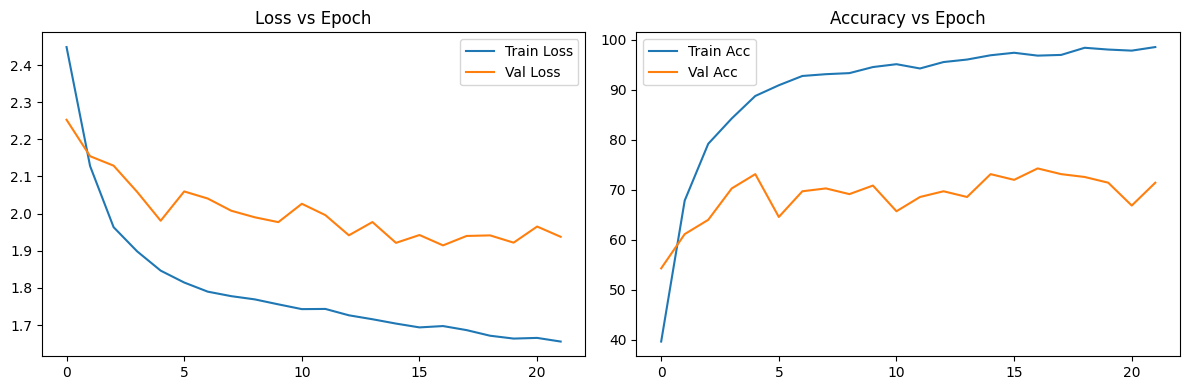


Evaluating best model on test set...


/tmp/ipykernel_23/1126838295.py:140: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_unified_model.pth'))



Test Set Results:

Classification Report:
+-------------------------------+-------------+----------+------------+-----------+
| Class                         |   Precision |   Recall |   F1-Score |   Support |
+===============================+=============+==========+============+===========+
| Actinic keratoses             |       0.7   |    0.7   |      0.7   |        30 |
+-------------------------------+-------------+----------+------------+-----------+
| Basal cell carcinoma          |       0.875 |    0.7   |      0.778 |        30 |
+-------------------------------+-------------+----------+------------+-----------+
| Benign keratosis like lesions |       0.71  |    0.733 |      0.721 |        30 |
+-------------------------------+-------------+----------+------------+-----------+
| Dermatofibroma                |       0.667 |    0.833 |      0.741 |        12 |
+-------------------------------+-------------+----------+------------+-----------+
| Melanocytic nevi              |

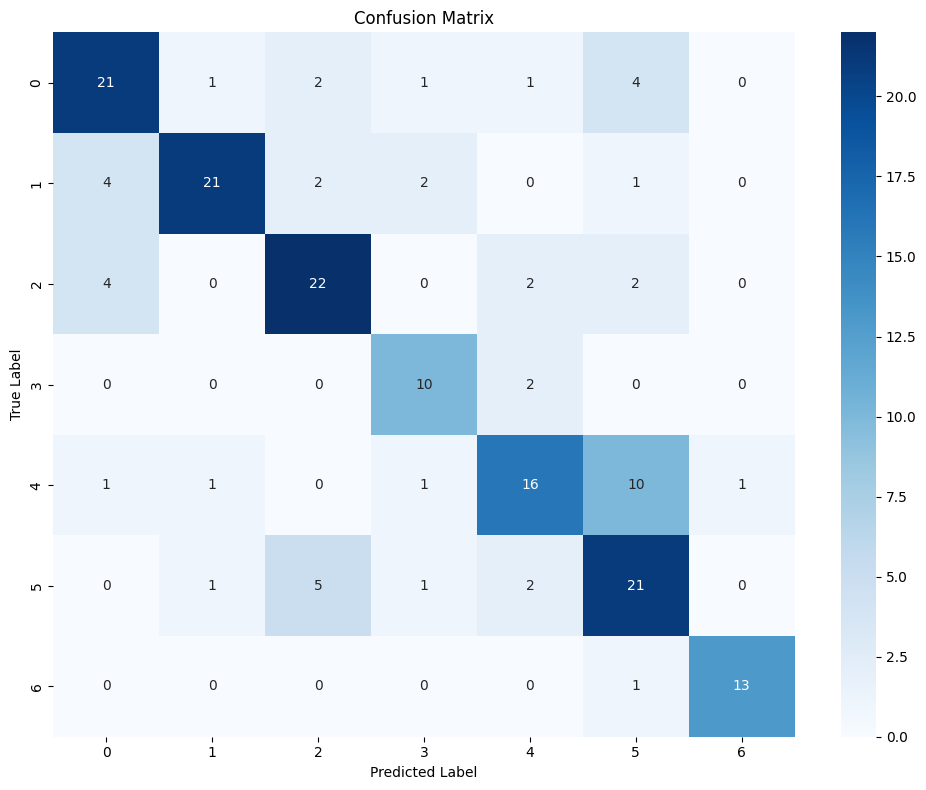

In [43]:
from sklearn.metrics import classification_report
from tabulate import tabulate

# Updated dictionary mapping numeric indices to class names
idx_to_name = {
    0: 'Actinic keratoses',
    1: 'Basal cell carcinoma',
    2: 'Benign keratosis like lesions',
    3: 'Dermatofibroma',
    4: 'Melanocytic nevi',
    5: 'Melanoma',
    6: 'Vascular lesions'
}

def print_metrics(epoch, metrics, phase='Training'):
    print(f"\n{phase} Metrics - Epoch {epoch + 1}:")
    for key, value in metrics.items():
        print(f"{key.capitalize()}: {value:.4f}" if isinstance(value, float) else f"{key.capitalize()}: {value}")

def format_classification_report(report_dict):
    headers = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
    rows = []
    
    # Add per-class metrics
    for class_idx in range(7):
        if str(class_idx) in report_dict:
            metrics = report_dict[str(class_idx)]
            class_name = idx_to_name[class_idx]
            rows.append([
                f"{class_name}",
                f"{metrics['precision']:.3f}",
                f"{metrics['recall']:.3f}",
                f"{metrics['f1-score']:.3f}",
                metrics['support']
            ])
    
    # Add average metrics
    for avg_type in ['macro avg', 'weighted avg']:
        if avg_type in report_dict:
            metrics = report_dict[avg_type]
            rows.append([
                avg_type.capitalize(),
                f"{metrics['precision']:.3f}",
                f"{metrics['recall']:.3f}",
                f"{metrics['f1-score']:.3f}",
                metrics['support']
            ])
    
    return tabulate(rows, headers=headers, tablefmt='grid', maxcolwidths=[30, 10, 10, 10, 10])

def main():
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Initialize model
    model = UnifiedModel(num_classes=7).to(device)
    
    # Calculate total parameters
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total number of parameters: {total_params:,}")
    
    # Initialize trainer
    trainer = Trainer(model, device, class_weights_tensor.to(device))
    
    # Initialize evaluator
    evaluator = Evaluator(model, device)
    
    # Training parameters
    num_epochs = 25
    best_val_loss = float('inf')
    patience = 5
    patience_counter = 0
    
    # Track if the best model is saved
    best_model_saved = False
    
    # For plotting
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    # Training loop
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch + 1}/{num_epochs}")
        print("-" * 20)
        
        # Train
        train_metrics = trainer.train_epoch(train_loader)
        print_metrics(epoch, train_metrics, 'Training')
        
        # Validate
        val_metrics = trainer.validate(val_loader)
        print_metrics(epoch, val_metrics, 'Validation')
        
        # Store metrics for plotting
        train_losses.append(train_metrics['total_loss'])
        val_losses.append(val_metrics['total_loss'])
        train_accuracies.append(train_metrics['accuracy'])
        val_accuracies.append(val_metrics['accuracy'])
        
        # Early stopping check
        if val_metrics['total_loss'] < best_val_loss:
            best_val_loss = val_metrics['total_loss']
            patience_counter = 0
            best_model_saved = True
            # Save the best model
            torch.save(model.state_dict(), 'best_unified_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("\nEarly stopping triggered!")
                break
    
    # Notify if the best model was saved
    if best_model_saved:
        print("\nSaving best model...")

    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title('Loss vs Epoch')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Acc')
    plt.plot(val_accuracies, label='Val Acc')
    plt.title('Accuracy vs Epoch')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Load best model and evaluate
    print("\nEvaluating best model on test set...")
    model.load_state_dict(torch.load('best_unified_model.pth'))
    results = evaluator.evaluate(test_loader)
    
    print("\nTest Set Results:")
    print("\nClassification Report:")
    print(format_classification_report(results['classification_report']))
    
    print(f"\nMean Dice Score: {results['mean_dice']:.4f}")
    print(f"Mean IoU: {results['mean_iou']:.4f}")
    
    # Plot confusion matrix
    evaluator.plot_confusion_matrix(results['confusion_matrix'])

if __name__ == "__main__":
    main()
